In [6]:
%pip install pillow matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# read input data
rn = pd.read_csv('input/ReadsNumb_Oral.csv')
fs = pd.read_csv('input/reads_sizeL_oral__beforeClean.csv')
mrg = pd.merge(rn, fs, on='smpls_ID')
mrg.head(2)

,smpls_ID,reads_number,file_size
0,CRC001_S12,20905065,3470848
1,CRC002_S13,47102155,7853952


In [2]:
# read final input
mrg = pd.read_excel('input/ReadsNumb_Oral1.xlsx', sheet_name='ReadsNumb_Oral')
mrg.head(2)

,smpls_ID,Files_size,ReadsNumber,RN_host_removed,"RN_host_removed,%",RN_only_host,"RN_only_host,%",Adenoma_risk,N_polyps,Polyp_size_mm,Sample_type
0,CRC001_S12,3470848.0,20905065.0,1186263.0,0.056745,19423245.0,0.929117,High,5.0,14,Hyperplastic
1,CRC002_S13,7853952.0,47102155.0,1485580.0,0.031540,44966836.0,0.954666,High,2.0,20,High grade serous adenoma


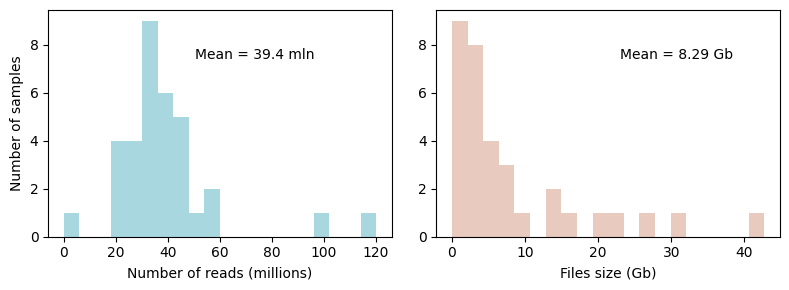

In [ ]:
import matplotlib.pyplot as plt

# make a plot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
 
axs[0].hist(mrg['ReadsNumber']/1000000, bins=20, alpha=0.5, color='#55b0c2')
axs[0].set_xlabel('Number of reads (millions)')
axs[0].set_ylabel('Number of samples')
#axs[0].set_title('Reads number per sample')
mn = mrg['ReadsNumber'].mean()/1000000
axs[0].text(0.6, 0.8, 'Mean = '+str(mn)[0:4]+' mln', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

axs[1].hist(mrg['RN_host_removed']/1000000, bins=20, alpha=0.5, color='#d4967f')
axs[1].set_xlabel('Files size (Gb)')
mn2 = mrg['RN_host_removed'].mean()/1000000
#axs[1].set_title('Files size per sample')
axs[1].text(0.7, 0.8, 'Mean = '+str(mn2)[0:4]+' Gb', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

plt.tight_layout()
plt.savefig('results/Ststs1.png', dpi=300)